In [ ]:
Web : https://ubiops.com/how-to-build-and-implement-a-recommendation-system-from-scratch-in-python/
Data : https://github.com/UbiOps/cookbook/blob/master/recommender-system/recommender-system/store_data.csv
        
movie_Data_Download - https://grouplens.org/datasets/movielens/
Web - https://movielens.org/

In [ ]:
# 1. 시대별 인기영화 : # pandas matplotlib
    # 1-1) 화제성순
    # 1-2) 평점순
# 2. 시간에 따른 인기장르의 변화.
# 3. 꾸준히 사랑받는 영화
# 4. 한계
    # 감독명, 배우명 등 영화흥행의 중요요소들에 대한 분석부재
# 5. 활용
    # 영화 추천
        # 추천 - 평점 + 인기(=평점 갯수)
        # 인기순 - 평점
        # 장르별 -> 흥미별
        # 테마 - 고전
        # 테마 - 시대별
# 6. 추가분석
    # tag-Genome을 스스로 생성해볼 것? 웹크롤링- > 최빈단어목록과 각 영화의 상관관계 top 1~3정도 #
    #                                              단순하게 각 영화에서의 최빈단어로 구성
    # 영화 이모저모 : 연도별 인기장르의 변화, 피드백수
        

In [1]:
import pandas as pd
movies = pd.read_csv('C:/Users/yoon/Desktop/Faust/15_project/ml-25m/movies.csv')
ratings = pd.read_csv('C:/Users/yoon/Desktop/Faust/15_project/ml-25m/ratings.csv')
# tags = pd.read_csv('D:/bigdata/note/project/ml-25m/tags.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [2]:
print(movies.isna().sum())
print(ratings.isna().sum())
# print(tags.isna().sum())
    # tags 데이터 프레임에 null값을 가진 셀 16개
print(movies.info())
print(ratings.info())
# print(tags.info()) # df.index / df.shape() / df[df.column[0]].count()

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


In [2]:
print(len(tags.index))
print(tags.info())
tags.dropna(axis=0, how='any', inplace=True)
print(tags.info())

1093360
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093344 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093344 non-null  int64 
 1   movieId    1093344 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093344 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 41.7+ MB
None


In [15]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_m = ratings.groupby(['movieId'])['rating'].mean() # groupby를 한 뒤에는 계층이 생기므로 reset_index() 작업이 필요할 수 있음.
ratings_m 
            # ratings.pivot_table(index='movieId',values='rating', aggfunc='mean')

movieId
1         3.893708
2         3.251527
3         3.142028
4         2.853547
5         3.058434
            ...   
209157    1.500000
209159    3.000000
209163    4.500000
209169    3.000000
209171    3.000000
Name: rating, Length: 59047, dtype: float64

In [8]:
ratings.groupby(['movieId']).mean()

,userId,rating,timestamp
movieId,,,
1,81294.564728,3.893708,1.153152e+09
2,81358.542554,3.251527,1.122310e+09
3,81343.694934,3.142028,9.806023e+08
4,81266.193024,2.853547,9.424605e+08
5,81002.872460,3.058434,1.004723e+09
...,...,...,...
209157,119571.000000,1.500000,1.574281e+09
209159,115835.000000,3.000000,1.574281e+09
209163,6964.000000,4.500000,1.574285e+09


In [5]:
pd.DataFrame(ratings_m).reset_index()
                # 위에서는 처음 ['rating'].mean()을 merge할 때 rating열이 없었으므로 필드명이 그대로 삽입되었지만
                # 이후 [rating'].count()가 추가되면 rating이라는 필드명이 중복되기 때문에 rating_x, rating_y로 자동 변형되는듯
                     # >=25번 이상 발생이라는 제한유무와 무관한듯?

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434
...,...,...
59042,209157,1.500000
59043,209159,3.000000
59044,209163,4.500000
59045,209169,3.000000


In [ ]:
# movies DataFrame에 62423개의 movieId가 존재 vs ratings DataFrame을 .groupby[('movieId')]했을 때 59047가 반환
    # groupby 메서드에서 파라미터(매개변수) dropno = True 가 기본값임.

In [4]:
movies_1 = pd.merge(movies, ratings_m, on=['movieId']) # ratings_m은 데이터프레임이 아닌 상태
movies_1.head(10)
            # merge함수와 concat함수의 차이점을 이해하고 사용처의 구분을 기억하자! 
            # iris_df = pd.concat([x, y], axis=1) # 열병합의 하기 위해선 행의 수가 같아야 함.

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434
5,6,Heat (1995),Action|Crime|Thriller,3.854909
6,7,Sabrina (1995),Comedy|Romance,3.363666
7,8,Tom and Huck (1995),Adventure|Children,3.114583
8,9,Sudden Death (1995),Action,2.992051
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.421458


In [5]:
movies_1.count() # .size()와의 차이를 기억할 것. size()는 에러가 발생함(series만 가능한 듯).

movieId    59047
title      59047
genres     59047
rating     59047
dtype: int64

In [8]:
movies_1.size

236188

In [52]:
movies_2.loc[0,'title'][27:-1]

''

In [5]:
# 시도4
import pandas as pd
# movies_1['released'] = movies_1['title'].str.extract('(^\)+\d{4}+(\)$)') # (로 시작하고 )로 끝나는 문자를 만들고 싶은데 에러발생...
movies_1['released'] = movies_1['title'].str.extract('(\d{4})')
movies_1
# r_year
# print(r_year.isnull().sum())
# print(r_year)
# print(r_year.info())
# movies_1['released'] = r_year
# movies_2['release'] = pd.merge(movies_2, r_year, on='')
            # 최초에 만들 떄는 extract 함수를 구글링하여 썻는데, 이는 정규식과의 결합 이용이 요구됨
            # 앞에서 공부했던 것을 적용시킬 때 title 내의 '(' 기호를 기준으로 분리(split)하고 
                # 반환되는 리스트의 요소를 이용하여 연도를 추출하는 것이 더 쉬울듯. -> 시도 5

,movieId,title,genres,rating,released
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995
...,...,...,...,...,...
59042,209157,We (2018),Drama,1.500000,2018
59043,209159,Window of the Soul (2001),Documentary,3.000000,2001
59044,209163,Bad Poems (2018),Comedy|Drama,4.500000,2018
59045,209169,A Girl Thing (2001),(no genres listed),3.000000,2001


In [2]:
# 마지막으로 찾아낸 것(시도 5-0)
# released를 뽑아낼 때 apply + split도 유사한 작업을 할 수 있을듯?
a = movies['title'].apply(lambda x : x.split('(')[-1])
a

0        1995)
1        1995)
2        1995)
3        1995)
4        1995)
         ...  
62418    2018)
62419    2001)
62420    2018)
62421    2001)
62422    1962)
Name: title, Length: 62423, dtype: object

In [32]:
# 마지막으로 찾아낸 것(시도 5-1)
a = movies['title'].apply(lambda x : x[-5:-1])
a
            # a.astype('int32') 적용시 에러발생. ValueError: invalid literal for int() with base 10: '948)'

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
62418    2018
62419    2001
62420    2018
62421    2001
62422    1962
Name: title, Length: 62423, dtype: object

In [6]:
# title로부터 released값을 뽑아낼 때 정규표현식에 해당하는 값이 없던 행들의 경우 NaN값을 갖게 됨
movies_1[movies_1['released'].isnull()]
                    # 여기서는 개봉년도가 결측치라도 일단 제거하지 않고 진행.

,movieId,title,genres,rating,released
15023,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,3.400000,NaN
24817,123619,Terrible Joe Moran,(no genres listed),2.500000,NaN
25555,125571,The Court-Martial of Jackie Robinson,(no genres listed),3.500000,NaN
25580,125632,In Our Garden,(no genres listed),4.000000,NaN
25659,125958,Stephen Fry In America - New World,(no genres listed),3.394737,NaN
...,...,...,...,...,...
58711,207714,Tales of Found Footage,(no genres listed),3.000000,NaN
58743,207884,Enduring Destiny,(no genres listed),5.000000,NaN
58911,208597,Punk the Capital: Building a Sound Movement,Documentary,5.000000,NaN
58951,208763,Yosemite: The Fate of Heaven,(no genres listed),2.500000,NaN


# movies_1 : rating, released 추가완료! -----

In [15]:
### 더이상 아래처럼 여러단계를 거칠 필요 없이 size()를 사용하고 reset_index()도 한꺼번에 사용할 수 있음!
ratings_c = ratings.groupby(['movieId']).size().reset_index(name='counts')
ratings_c.head()

,movieId,counts
0,1,57309
1,2,24228
2,3,11804
3,4,2523
4,5,11714


In [ ]:
# 한 명이 5점 주고 더이상의 평점보고가 없으면 최상단에 위치하게되는 문제가 발생.
    # 지금 왜 평점이 0과 5점으로 끊기고 있지?(최소/최대만 나와서 그런듯.)
# 1. 최소평점획득 횟수가 필요
# 2. 단순 평점순이 아닌 평점획득횟수와 결합하여 새로운 지표를 생성할 필요

In [7]:
# counts를 추가하기 위해
# 위에서는 grouped_ratings = ratings.groupby(['movieId'])['rating'].mean()
ratings_c = ratings.groupby(['movieId'])['rating'].count()
ratings_c

movieId
1         57309
2         24228
3         11804
4          2523
5         11714
          ...  
209157        1
209159        1
209163        1
209169        1
209171        1
Name: rating, Length: 59047, dtype: int64

In [7]:
ratings_c = pd.DataFrame(ratings_c).reset_index()
# (1) ratings_count.columns = ['movieId', 'counts'] # 두 번 실행하면 안됨.

In [8]:
    # 실행하기전에 ratings_count가 dataframe이어야 함.(series이면 오류도 안나고 그냥 적용이 안됨)
# (1) -> (2)
ratings_c = ratings_c.rename({'rating':'counts'},axis=1)
ratings_c

,movieId,counts
0,1,57309
1,2,24228
2,3,11804
3,4,2523
4,5,11714
...,...,...
59042,209157,1
59043,209159,1
59044,209163,1
59045,209169,1


In [56]:
# (3)
ratings_c.set_axis(['movieId', 'counts'], axis=1)
    # (1)+(2) vs (3) 인가? ㄴㄴ 이부분 재확인 필요

NameError: name 'ratings_count' is not defined

In [12]:
movies_2 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_2
# movies_2 = movies_2.sort_values(by='counts', ascending=False, ignore_index = True)
# movies_2.head(10)
            # movies_2 : rating을 25번 이상 받은 영화집합의 rating순 데이터프레임

,movieId,title,genres,rating,released,counts
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995,57309
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995,24228
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995,11804
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995,11714
...,...,...,...,...,...,...
59042,209157,We (2018),Drama,1.500000,2018,1
59043,209159,Window of the Soul (2001),Documentary,3.000000,2001,1
59044,209163,Bad Poems (2018),Comedy|Drama,4.500000,2018,1
59045,209169,A Girl Thing (2001),(no genres listed),3.000000,2001,1


In [13]:
### 이젠 사용하지 말 것! 정확히 숫자만 뽑아내도록 아래 시도 4의 정규표현식 사용!
movies_2['released']= movies_2['title'].str[-5:-1]
##################################################사용 ㄴㄴ
    ##############################################이게 더 좋아보이는데...?;;;

In [32]:
import pandas as pd
movies_2 = pd.merge(movies_1, ratings_c, on='movieId')
movies_2.sort_values(by='counts', ascending=False, ignore_index=True, inplace=True)
movies_2.head(10)

,movieId,title,genres,rating,released,counts
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717
6,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.679175,1993,64144
7,527,Schindler's List (1993),Drama|War,4.247579,1993,60411
8,110,Braveheart (1995),Action|Drama|War,4.002273,1995,59184
9,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773


In [25]:
print(movies_2.count())
print(movies_2.isna().sum())

movieId     59047
title       59047
genres      59047
rating      59047
released    58679
counts      59047
dtype: int64
movieId       0
title         0
genres        0
rating        0
released    368
counts        0
dtype: int64


In [13]:
import numpy as np
movies_2['counts'].max()

81491

# movies_2 : counts생성 & 정렬실시(25개 미만도 모두 포함) -> 인기순 영화목록에 사용 ----------

In [28]:
movies_1.head()

,movieId,title,genres,rating,released
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995


In [78]:
ratings_c = ratings.groupby('movieId')['rating'].count()
ratings_c = pd.DataFrame(ratings_c).reset_index()
ratings_c = ratings_c.rename({'rating' : 'counts'}, axis=1) # 59047개
ratings_c = ratings_c[ratings_c['counts']>=25] # 16970개
movies_3 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_3 = movies_3.sort_values(by='rating', ascending=False, ignore_index = True)
movies_3.head(10)

,movieId,title,genres,rating,released,counts
0,171011,Planet Earth II (2016),Documentary,4.483096,2016,1124
1,159817,Planet Earth (2006),Documentary,4.464797,2006,1747
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
3,170705,Band of Brothers (2001),Action|Drama|War,4.398599,2001,1356
4,171495,Cosmos,(no genres listed),4.326715,NaN,277
5,858,"Godfather, The (1972)",Crime|Drama,4.324336,1972,52498
6,179135,Blue Planet II (2017),Documentary,4.289833,2017,659
7,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,1995,55366
8,174551,Obsession (1965),Comedy,4.277778,1965,36
9,198185,Twin Peaks (1989),Drama|Mystery,4.267361,1989,288


In [55]:
ratings_c = ratings.groupby('movieId').size().reset_index(name='counts')
movies_3 = pd.merge(movies_1, ratings_c, on = 'movieId')
movies_3 = movies_3[movies_3['counts']>=25]
movies_3.sort_values('rating', ascending=False, inplace=True)
movies_3.head().append(movies_3.tail())

,movieId,title,genres,rating,released,counts
42953,171011,Planet Earth II (2016),Documentary,4.483096,2016,1124
38361,159817,Planet Earth (2006),Documentary,4.464797,2006,1747
314,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
42806,170705,Band of Brothers (2001),Action|Drama|War,4.398599,2001,1356
43172,171495,Cosmos,(no genres listed),4.326715,NaN,277
4669,4775,Glitter (2001),Drama|Musical|Romance,1.125561,2001,669
32837,145096,Barbie & Her Sisters in the Great Puppy Advent...,Animation,1.118644,2015,59
6360,6483,From Justin to Kelly (2003),Musical|Romance,1.027578,2003,417
8144,8859,SuperBabies: Baby Geniuses 2 (2004),Comedy,0.899038,2004,208
7157,7282,"Hip Hop Witch, Da (2000)",Comedy|Horror|Thriller,0.854839,2000,31


# movies_1에 rating과 counts>25를 조합해 정렬까지 완료 : movies_3-----평점순 영화목록에 사용

<AxesSubplot:xlabel='released', ylabel='counts'>

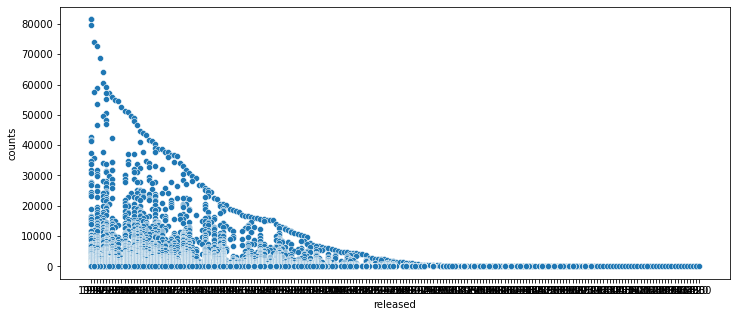

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'released', y = 'counts', data = movies_2)
# 아래 정규식 활용한 연도가 직접 쓰이기 직전에 활용할 것.

In [33]:
# 불확실한 정규표현식 대신 for문을 사용하여 'released'의 정확한 값을 구하는데 성공!!!!

import numpy as np
movies_2['test'] = np.nan
for i in movies_2.index:
    idx = movies_2.loc[i, 'title'].find('(')
    movies_2.loc[i,'test'] = movies_2.loc[i, 'title'][int(idx)+1:-1]
movies_2['test']

########################################################################################
# 1분 2초....ㄷㄷㄷ

0        1994
1        1994
2        1994
3        1991
4        1999
         ... 
59042    2013
59043    1932
59044    2007
59045    2007
59046    1962
Name: test, Length: 59047, dtype: object

In [34]:
movies_2.count()

movieId     59047
title       59047
genres      59047
rating      59047
released    58679
counts      59047
test        59047
dtype: int64

In [36]:
movies_2.isnull().sum()

movieId       0
title         0
genres        0
rating        0
released    368
counts        0
test          0
dtype: int64

In [37]:
movies_2.dropna()

,movieId,title,genres,rating,released,counts,test
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491,1994
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482,1994
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672,1994
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127,1991
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674,1999
...,...,...,...,...,...,...,...
59042,167308,Hell's Caretaker (2013),(no genres listed),5.000000,2013,1,2013
59043,167326,Wedding Rehearsal (1932),Comedy|Drama,2.000000,1932,1,1932
59044,167336,Saint Death (2007),Documentary,2.500000,2007,1,2007
59045,167338,La Santa Muerte (2007),(no genres listed),1.000000,2007,1,2007


<AxesSubplot:xlabel='test', ylabel='counts'>

C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27714 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27714 missing from current font.
  font.set_text(s, 0, flags=flags)


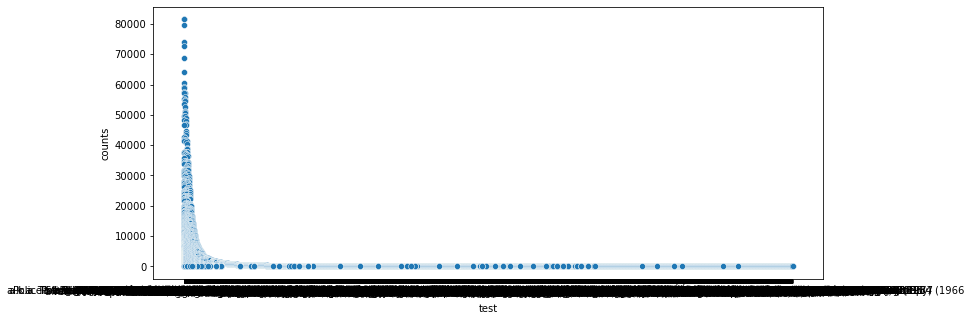

In [13]:
###########################################################

plt.figure(figsize = (12,5))
sns.scatterplot(x = 'test', y = 'counts', data = movies_2)

# 2분...ㄷㄷㄷ;;;

In [16]:
movies_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59047 entries, 0 to 59046
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movieId   59047 non-null  int64  
 1   title     59047 non-null  object 
 2   genres    59047 non-null  object 
 3   rating    59047 non-null  float64
 4   released  58679 non-null  object 
 5   counts    59047 non-null  int64  
 6   test      59047 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


In [16]:
ratings_c = ratings.groupby('movieId')['rating'].count()
ratings_c = pd.DataFrame(ratings_c).reset_index()
ratings_c = ratings_c.rename({'rating':'counts'},axis=1)
ratings_c = ratings_c[ratings_c['counts']>=25]
movies_4 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_4 = movies_4.dropna()
movies_4['released'] = movies_4['released'].astype('int64')
movies_4 = movies_4[(movies_4['released']>= 1895) & (movies_4['released']<=2019)]
movies_4['value'] = movies_4['rating'] + (movies_4['counts']/movies_4['counts'].max()*5) + (movies_4['released']-movies_4['released'].min())/(movies_4['released'].max()-movies_4['released'].min())*3
movies_4 = movies_4.sort_values(by='value', ascending=False, ignore_index=True)
movies_4.head(10)

,movieId,title,genres,rating,released,counts,value
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482,11.808185
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672,11.472466
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491,11.443173
3,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674,11.129248
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127,11.022093
5,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773,10.350543
6,527,Schindler's List (1993),Drama|War,4.247579,1993,60411,10.325152
7,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717,10.320292
8,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,1995,55366,10.100770
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.091189,2001,55736,10.075469


In [20]:
# 더욱 간결해진 코드 발견
ratings_c = ratings.groupby('movieId').size().reset_index(name='counts')
movies_4 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_4 = movies_4.dropna()
movies_4['released'] = movies_4['released'].astype('int64')
movies_4 = movies_4[(movies_4['released']>= 1895) & (movies_4['released']<=2019)]
movies_4['value'] = movies_4['rating'] + (movies_4['counts']/movies_4['counts'].max()*5) + (movies_4['released']-movies_4['released'].min())/(movies_4['released'].max()-movies_4['released'].min())*3
movies_4 = movies_4.sort_values(by='value', ascending=False, ignore_index=True)
movies_4.head(10)

,movieId,title,genres,rating,released,counts,value
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482,11.808185
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672,11.472466
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491,11.443173
3,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674,11.129248
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127,11.022093
5,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773,10.350543
6,527,Schindler's List (1993),Drama|War,4.247579,1993,60411,10.325152
7,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717,10.320292
8,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,1995,55366,10.100770
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.091189,2001,55736,10.075469


In [39]:
# 더욱 간결해진 코드 발견
# ratings_c = ratings.groupby('movieId').size().reset_index(name='counts')
# movies_4 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_4 = movies_2.dropna()
movies_4['released'] = movies_4['released'].astype('int64')
movies_4 = movies_4[(movies_4['released']>= 1895) & (movies_4['released']<= 2019)]
movies_4['value'] = movies_4['rating'] + (movies_4['counts']/movies_4['counts'].max()*5) + (movies_4['released']-movies_4['released'].min())/(movies_4['released'].max()-movies_4['released'].min())*3
movies_4 = movies_4.sort_values(by='value', ascending=False, ignore_index=True)
movies_4.head(10)
# warning은 위에 두 줄이 사라진것 차이때문에 발생하는데
#     에러 원인 설명은 astype()함수의 이용때문으로 표현되고 있음...

C:\Users\yoon\AppData\Local\Temp/ipykernel_17760/205850983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_4['released'] = movies_4['released'].astype('int64')


,movieId,title,genres,rating,released,counts,test,value
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482,1994,11.808185
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672,1994,11.472466
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491,1994,11.443173
3,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674,1999,11.129248
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127,1991,11.022093
5,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773,1999,10.350543
6,527,Schindler's List (1993),Drama|War,4.247579,1993,60411,1993,10.325152
7,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717,1977,10.320292
8,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,1995,55366,1995,10.100770
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.091189,2001,55736,2001,10.075469


# 1 추천영화로 제공할 수 있도록 movie_4가 완성됨 ----------

In [12]:
movies_4['released'].unique()

array([1.0, 2.0, 3.0, ..., 207309.0, 207405.0, 207830.0], dtype=object)

In [21]:
movies_4['released'].max()

9000

In [19]:
movies_4 = movies_4.sort_values('value', ascending=False, ignore_index=True)
movies_4.head(10)

,movieId,title,genres,rating,released,counts,value
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482,9.462874
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672,9.127155
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491,9.097861
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127,8.749288
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674,8.663094
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717,8.385846
6,527,Schindler's List (1993),Drama|War,4.247579,1993,60411,8.004010
7,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773,7.884389
8,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,1995,55366,7.731290
9,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.144122,1980,57361,7.713091


In [22]:
import numpy as np
ratings_c = ratings.groupby('movieId')['rating'].count()
ratings_c = pd.DataFrame(ratings_c).reset_index()
ratings_c = ratings_c.rename({'rating':'counts'},axis=1)
ratings_c = ratings_c[ratings_c['counts']>=25]
movies_4 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_4
# movies_4['value'] = movies_4['rating']+((movies_4['counts']/movies_4['counts'].max())*5)
#             # value는 나중에 추천영화시 별도로 사용
# movies_4 = movies_4.sort_values(by='value', ascending=False, ignore_index = True)
# movies_4.head(10)
#             # movies_3은 rating(5점 만점) + counts(5점 만점)을 합산한 값인 value 기준으로 정렬

,movieId,title,genres,rating,released,counts
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995,57309
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995,24228
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995,11804
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995,11714
...,...,...,...,...,...,...
16965,206805,In the Shadow of the Moon (2019),Crime|Mystery|Sci-Fi,3.190000,2019,50
16966,206845,The Laundromat (2019),Comedy|Crime|Drama,3.250000,2019,42
16967,207309,Fractured (2019),Thriller,3.216216,2019,37
16968,207405,Doctor Sleep (2019),Horror,3.730769,2019,39


In [ ]:
# 최근 영화는 평가수가 많을 수가 없는 구조인듯?
# 어떤 지표를 개발할지에 대한 고민이 필요함 -> 평가횟수 최소 30개 이상 + 스케일조정 실시

## released를 도출하려는 시도(이젠 movies_2에 이미 적용함) ----- 완성본 도출했음으로 사용 ㄴㄴ -----

In [15]:
# 시도 1 ############### 시도 4로 사용 할 것!
movies_3['released']= movies_3['title'].str[-5:-1]
movies_3[movies_3['released']=='1999']

,movieId,title,genres,rating,counts,released,value
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,72674,1999,8.613119
7,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,58773,1999,7.834414
17,2858,American Beauty (1999),Drama|Romance,4.107340,53689,1999,7.401508
26,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,4.009751,46713,1999,6.875896
66,3147,"Green Mile, The (1999)",Crime|Drama,4.027754,30482,1999,5.898022
...,...,...,...,...,...,...,...
15785,2974,Bats (1999),Horror|Thriller,1.793310,583,1999,1.829081
15786,3666,Retro Puppet Master (Puppet Master 7) (1999),Horror|Sci-Fi|Thriller,1.820755,106,1999,1.827259
15810,2555,Baby Geniuses (1999),Comedy,1.699346,1377,1999,1.783834
15831,2887,Simon Sez (1999),Action|Comedy,1.705357,112,1999,1.712229


In [61]:
# 시도 2
# movies_3['title'].map(lambda x : x.str[-5, -1])
# movies_3.apply(lambda x : x[-5, -1])

movies_3['title'].apply(lambda x : x[x.find('(')+1 : -1])

42953     2016
38361     2006
314       1994
42806     2001
43172    Cosmo
         ...  
4669      2001
32837     2015
6360      2003
8144      2004
7157      2000
Name: title, Length: 16970, dtype: object

In [113]:
# 시도 3
movies_3.assign(released=pd.Series(movies_3['title'].str[-5,-1]))

,movieId,title,genres,rating,counts,value,released
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482,9.413024,NaN
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672,9.077305,NaN
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,81491,9.048011,NaN
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,74127,8.699513,NaN
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,72674,8.613119,NaN
...,...,...,...,...,...,...,...
15910,4775,Glitter (2001),Drama|Musical|Romance,1.125561,669,1.166608,NaN
15911,145096,Barbie & Her Sisters in the Great Puppy Advent...,Animation,1.118644,59,1.122264,NaN
15912,6483,From Justin to Kelly (2003),Musical|Romance,1.027578,417,1.053164,NaN
15913,8859,SuperBabies: Baby Geniuses 2 (2004),Comedy,0.899038,208,0.911801,NaN


In [19]:
# 시도 4 ################################################
import pandas as pd
r_year = movies_1.title.str.extract(r'(\d{4})')
r_year
#movies_3['release'] = pd.merge()
            # https://www.geeksforgeeks.org/get-the-substring-of-the-column-in-pandas-python/
            # 드디어 구해냄.ㅠㅠ

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
59042,2018
59043,2001
59044,2018
59045,2001


In [2]:
# 위에서는 groupby함수를 사용하면서 계산식을 count()로 하는 방법을 사용하였는데
#     아래의 방법도 동일한 결과를 가져다 주는듯!
ratings_ = ratings
ratings_['counts'] = 1
ratings_ = ratings_.groupby('movieId')['counts'].sum().to_frame().reset_index()

In [3]:
ratings_.sort_values('counts', ascending=False)

,movieId,counts
351,356,81491
314,318,81482
292,296,79672
585,593,74127
2480,2571,72674
...,...,...
41343,167308,1
41350,167326,1
41354,167336,1
41355,167338,1


**<font size = "6" color = "red"> counts가 movieId에 맞춰서 들어가지 못했음. </font>** <br>
-> merge - on을 사용해야함.

In [ ]:
############################# 잡동사니

In [28]:
len(movies_3['genres'].unique())
# 장르가 임의적으로 입력된건데 그것에 맞춰 매칭하는 것이 의미 있을까?
# 리스트컴프리헨션 or split 으로 장르 여러개인 것을 리스트화하고 
                # -> for문으로 개별 항목으로 나누기까진 할 수 있을듯???

# iris_df.loc[iris_df['Species'] == 'versicolor','Sepal.Length':'Petal.Width'] 
                # 조건을 부여하는 행,열을 불러올 경우 iloc은 사용할 수 없음.
                # 는 조회가 가능해지는 한 가지 방법인듯?
        
# 현실에서는 수상 내역이 있는 영화를 추천하는 서비스도 가능
# 어떤 시청자의 선호도를 분석해서 그에 맞는 영화 재추천...!

1323

In [76]:
movies_3.loc[:,'genres']

0                        Crime|Drama
1        Comedy|Crime|Drama|Thriller
2           Comedy|Drama|Romance|War
3              Crime|Horror|Thriller
4             Action|Sci-Fi|Thriller
                    ...             
15910          Drama|Musical|Romance
15911                      Animation
15912                Musical|Romance
15913                         Comedy
15914         Comedy|Horror|Thriller
Name: genres, Length: 15915, dtype: object

In [ ]:
tags['tag'].unique()

len(tags['tag'].unique())

# 데이터에서의 tag로 사이트방문자 입력값과 매칭하는건 힘들듯?

In [ ]:
1을 입력했을 때 작동하는 2를 입력했을 때 작동하는...무리겠지?

In [ ]:
전체 평점분포를 나타내고(boxplot or barplot) 선택한 영화의 위치를 표시하는거 가능한가?

In [3]:
from selenium import webdriver
dv = webdriver.Chrome('C:/Users/yoon/Desktop/NewFolder/chromedriver_win32/chromedriver.exe')
dv

<selenium.webdriver.chrome.webdriver.WebDriver (session="eb8496e030cf2323aeac284ba4985ff0")>

In [2]:
import requests, re, urllib


url = "https://movie.naver.com/movie/point/af/list.naver"
target = urllib.request.urlopen(url)
contents = target.read().decode('utf-8')

# comm = re.findall(r'</em>\\n</div>\\n<br>.+?<a href="#"', contents, re.DOTALL)
# raw = re.findall(r'<div class="list_netizen_score">.+?<a href="#"', contents, re.DOTALL)

raw = re.findall(r'<span class="st_on".+?<a href="#"', contents, re.DOTALL)

# raw = re.findall(r'</div>\n\t\t\t<br>.+?<a href="#"', contents, re.DOTALL)
# raw
# for comm in raw:
#     ready = re.search(r'<br>.+?<a href="#"', comm)
#     print(ready)

ready_to_print = " "

for comm in raw:
    ready = re.search(r'<br>(.+)\n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t<a href="#"', comm)
    print(ready.group(1))
    ready_to_print += ready.group(1)

with open('C:/Users/yoon/Desktop/NewFolder/project/movie_comments.txt', 'w', encoding='utf-8') as f:
    f.write(ready_to_print)

# [i.text for i in target_list]
# for i.text in target_list:
#     print("{}".format(target_list))
# ,로 구분했을 때 4번째 것만 뽑을 수 있나?

영화는 어쩌면 우리는 실험쥐 일지 모른다고 한다. 그리고 실험에 내동댕이 쳐진 쥐들은 제발 그만 멈춰달라 애원한다. 대롱대롱 매달린 마우스와 stop버튼은 신의 영역처럼 멀게만 느껴진다.우리는 이 고통스러운 실험을 스스로 멈출 수 있었을까? 갇힌 철창 안에서 지구를 지킬 수 있었을까? 가볍게 보기 시작한 영화는 끝나고나서 묵직한 여운을 남긴다. 
지루할 틈 없는 신선한 스토리임은 인정하나, 주인공들이 궁지로 내몰렸다기 보단 사서 고생하는 듯한 느낌이 강해서 긴장감이 약하게 느껴졌다 
소라치 뇌절해줘 
사랑하는 사람을 기쁘게 해주는 건 생각만큼 어렵지 않음을.. 
감동과 전율, 스포츠 영화의 최고봉! 
이거 퍼시픽림 짭이냐? 
성령펀치... 할레루야 
울버린의 휴잭맨도 좋지만, 이 영화의 휴잭맨도 너무 좋았다. 도입부와 마지막의 나레이션 그리고 대사들이 하나같이 감동적. 영화는 참신하고 신선한 소재는 좋았지만, 그 것을 많이 못살려서 완성도가 조금 떨어져서 아쉬웠다. 그래도 배우들의 연기가 너무 좋았던 영화. 
 
슬로우모션 식겁~ 지켜줘서 고마워! 


In [ ]:
# Both will match any sequence of one or more characters. The difference is that:

# .+ is greedy and consumes as many characters as it can.
# .+? is reluctant and consumes as few characters as it can.
# See Differences Among Greedy, Reluctant, and Possessive Quantifiers in the Java tutorial.

In [ ]:
# 아래가 완성된 코드!!!

In [34]:
from selenium import webdriver
import requests, re, urllib
import time
dv = webdriver.Chrome('D:/bigdata/download/chromedriver_win32/chromedriver.exe')
url = 'https://movie.naver.com/movie/point/af/list.naver'
dv.get(url) # url에 해당하는 페이지가 open

for i in range(1,20):
    page_btn = dv.find_element_by_css_selector('div.paging a:nth-child(' + str(i) + ') > span') # 이 부분이 해결되어야 함!!!
    page_btn.click()
    time.sleep(1)

    target = urllib.request.urlopen("https://movie.naver.com/movie/point/af/list.naver?&page="+str(i))
    contents = target.read().decode('utf-8')
    crude = re.findall(r'<span class="st_on".+?<a href="#"', contents, re.DOTALL)
    
    i = i + 1
    ready_to_print = " "
    for c in crude:
        ready = re.search(r'<br>(.+)\n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t<a href="#"', c)
        print(ready.group(1))
        ready_to_save += ready.group(1)
    
    with open('D:/bigdata/note/project/movie_comments.txt', 'a', encoding='utf-8') as f:
        f.write(ready_to_save)


그냥보면알아요 최고의영화 
레베카 퍼거슨 이쁘네 이뻐 
진짜 완전 재밌어요 ㅜㅜ 완전 재 인생영화가 될 정도로 재미있었어요첨에는 그냥 이광수 배우님 나오신다고 하셔서 궁금했었는데 막상 보니까 너무 재밌고 연기를 잘하신거같아요!!! 제가 개봉 날짜를 기다린 영화는 싱크홀이 처음이에요!!! 
2편도 볼만해요 3편기대해 봅니다 괴물정체에 대해 좀더 자세히 나와줬으면 좋겠다 
조인성 김윤석 배우님 연기는 진짜 최고임.스토리는 나쁘지도 좋지도 않았지만 확실한건 북한을 만났을 때 남 북한이 어떤 자세를 취하는지 엿볼 수 있어서 조금 맴찢. 특히 마지막에 인사도 못하고 서로의 나라로 갈라질 때ㅠㅠ혼영 했는데 볼만하고 재밌었요. 추천! 
사자캐릭터가 등장인물들을 너무 막 대하는것같고 기대했던것보다 너무 지루하고 재미가없고 이야기의 내용은 마다가스카랑 좀 많이 비슷하다. 
와 액션은 좋다 쳐도 진짜 스토리가 너무하네... 
답이없다 보는 내내 고구마 먹은 듯 속이 답답하고 뒤는 얼마나 더 유치하고 재미없을까? 가 궁금하여 끝까지 보았다 
역시 믿고 보는 황정민님.. 역시 믿보황 
영화?나는자연인을 보는게 훨 낫지.. 
영화?나는자연인을 보는게 훨 낫지.. 
기대 안하면 재미없고기대 하면 재미없습니다전 기대안해서 재미없었습니다 
답답한 전개입니다 정의구현 하겠다는데 방해 좀 하지 마라 
감동의 영화 많은 사람들이 꼭 봤으면 하는 영화 
기대한거랑 비슷했어요~~그냥 귀여워서 볼만해요 ㅋ 
황정민의 연기뿐만 아니라 신인들의 연기까지 좋았네요 몰입감이 장난 아니예요 
보통 제가 극장에서 핸드폰 만지기나 도중 나오거나 하진 않는데 이건.... 하.... 이걸 왜 8k로 찍은지도 이해가 안가고(덕분에 노이즈 자글자글 해서 눈이 아픕니다) 진짜 의미없는 연출과 괴상하고 리듬감을 상실한 편집, 진짜 아무런 의미없는 효과음, 연기, 음악, 조명 다 최악입니다 이걸 추천하면 범죄 수준이에요 속지 마세요 감상포인트도 선택할게 없다 
주먹왕랄프2의 조금폭력적인 실사화정도. 내용보다는 저희 돈좀썼어

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div.paging a:nth-child(12) > span"}
  (Session info: chrome=92.0.4515.159)


In [51]:
# 1,2 실행의 결과와 3 실행의 결과가 달라 break가 있는 경우와 없는 경우의 효과를 확인해볼 수 있음!
def main():
    
    while True:
        print("1:추천영화 | 2:다중 조건 조회 | 3: 인기영화 | 4: 고평점 영화 | 5:실시간 트렌드(관객평) | 5: 나의 선호 | 9:종료",sep='|')
        fn = int(input('메뉴선택 : '))
        if fn == 1:
            fn1_movie_recommend()
        elif fn == 2:
            try:
                gen = input("원하는 장르를 입력해주세요")
                year = int(input("희망하는 연도를 4자리 숫자로 입력해주세요 : "))
                fn2_multiple_conditions(gen, year)############################
                break
#                 if year >= 1900 and year <= 2020:
#                     movie_by_year(year)
#                 elif len(year) != 4:
#                     print("네 자리로 입력해주세요 ")
#                     break
#             except ValueError:
#                 print("유효한 정수가 아닙니다")
            except Exception as e:
                print(e)
        elif fn == 3:
            fn3_top_counts_movies()
        elif fn == 4:
            fn4_top_rating_movies()            
        elif fn == 5:
            fn5_real_time_search()
            break
        elif fn == 9:
            fn_end()
            break

In [52]:
if __name__ == '__main__':
    main()

1:추천영화 | 2:다중 조건 조회 | 3: 인기영화 | 4: 고평점 영화 | 5:실시간 트렌드(관객평) | 5: 나의 선호 | 9:종료
메뉴선택 : 2
원하는 장르를 입력해주세요Comedy
희망하는 연도를 4자리 숫자로 입력해주세요 : 1995
       movieId                                   title  \
13           1                        Toy Story (1995)   
203         39                         Clueless (1995)   
229         21                       Get Shorty (1995)   
258        339          While You Were Sleeping (1995)   
260        745  Wallace & Gromit: A Close Shave (1995)   
...        ...                                     ...   
15380     6557                  Born to Be Wild (1995)   
15473      634                     Theodore Rex (1995)   
15697    44241                     Leprechaun 3 (1995)   
15890     8701          Dr. Jekyll and Ms. Hyde (1995)   
16414       56          Kids of the Round Table (1995)   

                                            genres    rating  released  \
13     Adventure|Animation|Children|Comedy|Fantasy  3.893708      1995   
203              

In [46]:
gen = input("원하는 장르는 입력해주세요 : ")
year = input("희망하는 연도를 4자리 숫자로 입력해주세요 : ")
movies_4.loc[movies_4['genres'].str.contains(gen, case=False) & (movies_4['released'] == int(year))]

            # msg = "서울시 강서구 화곡동"
            # msg.find('강서구') : (결과값)4

            #'조건을 이용한 조회'의 다른 방법 (Address가 강서구를 포함한 데이터의 모든 열)
            # member_df[member_df.Address.str.find('강서구') != -1]

원하는 장르는 입력해주세요 : Comedy
희망하는 연도를 4자리 숫자로 입력해주세요 : 1995


,movieId,title,genres,rating,released,counts,value
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995,57309,9.829341
203,39,Clueless (1995),Comedy|Romance,3.418738,1995,26230,7.447473
229,21,Get Shorty (1995),Comedy|Crime|Thriller,3.570162,1995,22277,7.356355
258,339,While You Were Sleeping (1995),Comedy|Romance,3.499389,1995,22111,7.275397
260,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,4.104362,1995,12241,7.274782
...,...,...,...,...,...,...,...
15380,6557,Born to Be Wild (1995),Adventure|Children|Comedy|Drama,2.321429,1995,56,4.744219
15473,634,Theodore Rex (1995),Comedy,2.279935,1995,309,4.718249
15697,44241,Leprechaun 3 (1995),Comedy|Fantasy|Horror,2.219298,1995,57,4.642150
15890,8701,Dr. Jekyll and Ms. Hyde (1995),Comedy|Horror,2.148515,1995,101,4.574067


In [31]:
def fn1_movie_recommend():
    print(movies_4['title'].head(10))
                # movies_3은 rating(5점 만점) + counts(5점 만점)을 합산한 값인 value 기준으로 정렬

In [50]:
def fn2_multiple_conditions(gen, year):
    print(movies_4.loc[movies_4['genres'].str.contains(gen, case=False) & (movies_4['released'] == int(year))])
    # https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
    # https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852#:~:text=Using%20%E2%80%9Ccontains%E2%80%9D%20to%20Find%20a,substring%20and%20False%20if%20not.
    # https://stackabuse.com/python-check-if-string-contains-substring/

In [28]:
def fn3_top_counts_movies():
    print(movies_3['title'].head(10))
                    # movies_3 : rating을 30번 이상 받은 영화집합의 counts순 데이터프레임
    # 미리 data의 load와 sort가 이뤄져있으면 안되고 함수가 입력됐을 때 한꺼번에 실행되도록 작성해야할듯.

In [29]:
def fn4_top_rating_movies():
    print(movies_4['title'].head(10))
                    # movies_4 : rating을 30번 이상 받은 영화집합의 rating순 데이터프레임
    
    # 미리 data의 load와 sort가 이뤄져있으면 안되고 함수가 입력됐을 때 한꺼번에 실행되도록 작성해야할듯.

In [8]:
def fn5_real_time_search():
    from selenium import webdriver
    import requests, re, urllib
    import time
    dv = webdriver.Chrome('D:/bigdata/download/chromedriver_win32/chromedriver.exe')
    url = 'https://movie.naver.com/movie/point/af/list.naver'
    dv.get(url) # url에 해당하는 페이지가 open

    for i in range(1,20):
        page_btn = dv.find_element_by_css_selector('div.paging a:nth-child(' + str(i) + ') > span') # 이 부분이 해결되어야 함!!!
        page_btn.click()
        time.sleep(1)

        target = urllib.request.urlopen("https://movie.naver.com/movie/point/af/list.naver?&page="+str(i))
        contents = target.read().decode('utf-8')
        crude = re.findall(r'<span class="st_on".+?<a href="#"', contents, re.DOTALL)

        i = i + 1
        ready_to_print = " "
        for c in crude:
            ready = re.search(r'<br>(.+)\n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t<a href="#"', c)
            ready_to_print += ready.group(1)

        with open('D:/bigdata/note/project/movie_comments.txt', 'a', encoding='utf-8') as f:
            f.write(ready_to_print)

    #########################################################################################################################

    from konlpy.tag import Kkma
    kkma = Kkma(max_heap_size=1024)

    target = open('D:/bigdata/note/project/movie_comments.txt', encoding = 'utf-8').read()
    word_list = kkma.pos('%r' % target)
    word_list = [t[0] for t in word_list if t[1]=='NNG']
    text = ' '.join(word_list)

    from wordcloud import WordCloud # 클래스이므로 대문자
    from wordcloud import STOPWORDS
    import matplotlib.pyplot as plt # import matplotlib as plt로 하면 에러발생
    from PIL import Image
    import numpy as np
    img = Image.open('D:/bigdata/src/09_자연어처리/twitter-computer-black-icons-free-frame.png').convert('RGBA')
    mask = np.array(img)

    불용어 = set(['영화', '연기', '배우'])
    wc = WordCloud(background_color = 'white',
                  max_words=300,
                  font_path = 'C:/Windows/Fonts/한컴산뜻돋움/HanSantteutDotumBold.ttf',
                  relative_scaling = 0.5,
                  stopwords = 불용어,
                  mask=mask)

    wc.generate(text) # 워드 클라우드 생성
    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

In [31]:
def fn_end():
    pass

In [51]:
fn3_temp = movies_3[movies_3['released'] == 1999]
fn3_temp = fn3_temp.sort_values(by="rating")
print(fn3_temp['title'].head(10))

Series([], Name: title, dtype: object)


In [ ]:
# 9. 종료하기
def fn9_end():

In [ ]:
# (선생님)ch09_파일io프로그래밍.ipynb (내꺼)ch09. 연습문제_7월_27일
# eclipse : ch12_interface com.lect.ex10_lib / co.lect.exexam

In [30]:
movies_3.head()

,movieId,title,genres,rating,counts,released,value
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482,1994,9.413024
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672,1994,9.077305
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,81491,1994,9.048011
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,74127,1991,8.699513
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,72674,1999,8.613119


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='rating', ylabel='counts'>

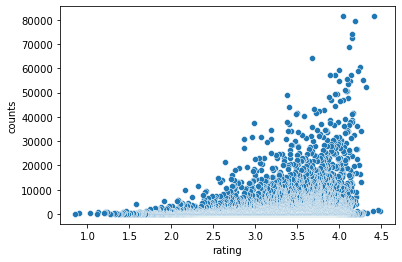

In [80]:
sns.scatterplot(data=movies_3, x='rating', y='counts')

<AxesSubplot:xlabel='released', ylabel='counts'>

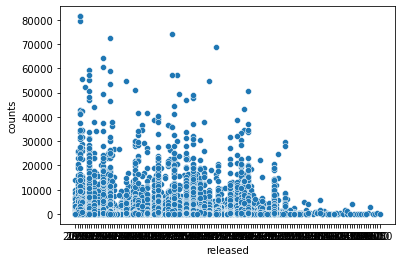

In [68]:
sns.scatterplot(x='released', y='counts', data = movies_4)

In [82]:
movies_prac = movies_3

In [83]:
movies_prac['released'].isnull().sum()
# movies_prac.dropna(axis=0, how='any', inplace=True)

26

In [35]:
movies_prac['released'].unique()

array([2016, 2006, 1994, 2001, 1972, 2017, 1995, 1965, 1989, 1974, 2013,
       1954, 1993, 1957, 2014, 2009, 1999, 1975, 1964, 2019, 1942, 1950,
       1949, 1983, 1959, 1944, 2011, 2002, 1990, 1961, 1982, 1976, 2008,
       1946, 1931, 2010, 1962, 1997, 1941, 1934, 1973, 1988, 1979, 1991,
       2000, 1980, 1985, 1963, 1958, 1998, 1940, 1996, 1978, 2015, 2005,
       1966, 1987, 1945, 1981, 1937, 1948, 1977, 2012, 1951, 1943, 1952,
       2018, 1986, 1968, 1926, 1984, 1955, 2004, 1992, 1936, 2003, 1967,
       1953, 1933, 1947, 1960, 1969, 1938, 1925, 1956, 1935, 2007, 1970,
       1939, 1929, 1971, 1928, 1927, 1932, 1921, 1930, 1080, 1924, 1923,
       2049, 1920, 1922, 5555, 1898, 1902, 1900, 3000, 1917, 2046, 1916,
       1918, 1912, 1919, 1915, 1001, 1776, 2022, 1138, 1000, 3096, 2036,
       1408, 2077, 1908, 1903, 2048, 1910, 1896, 1895, 1492, 1600, 9000,
       7500, 5000, 2050], dtype=int64)

In [36]:
movies_prac['released'] = movies_prac['released'].astype('int64')

<AxesSubplot:xlabel='released', ylabel='counts'>

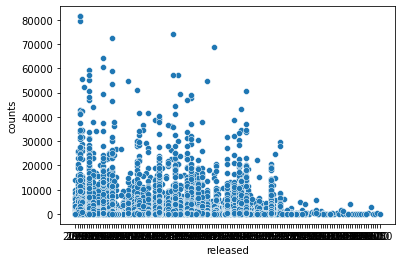

In [84]:
import seaborn as sns
sns.scatterplot(x='released', y='counts', data = movies_prac) 
            # movies_3을 기반으로 만들어졌으니 dropna에 의해 26개 필터링이된 상태인듯?
            # ㄴㄴ, sort_values가 이뤄진 차이인듯.

In [37]:
movies_prac = movies_prac[(movies_prac['released']>= 1895) &  (movies_prac['released']<=2019)]
movies_prac

,movieId,title,genres,rating,released,counts
0,171011,Planet Earth II (2016),Documentary,4.483096,2016,1124
1,159817,Planet Earth (2006),Documentary,4.464797,2006,1747
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
3,170705,Band of Brothers (2001),Action|Drama|War,4.398599,2001,1356
5,858,"Godfather, The (1972)",Crime|Drama,4.324336,1972,52498
...,...,...,...,...,...,...
16965,4775,Glitter (2001),Drama|Musical|Romance,1.125561,2001,669
16966,145096,Barbie & Her Sisters in the Great Puppy Advent...,Animation,1.118644,2015,59
16967,6483,From Justin to Kelly (2003),Musical|Romance,1.027578,2003,417
16968,8859,SuperBabies: Baby Geniuses 2 (2004),Comedy,0.899038,2004,208


In [23]:
movies_prac['released'].unique()

array([2016, 2006, 1994, 2001, 1972, 2017, 1995, 1965, 1989, 1974, 2013,
       1954, 1993, 1957, 2014, 2009, 1999, 1975, 1964, 2019, 1942, 1950,
       1949, 1983, 1959, 1944, 2011, 2002, 1990, 1961, 1982, 1976, 2008,
       1946, 1931, 2010, 1962, 1997, 1941, 1934, 1973, 1988, 1979, 1991,
       2000, 1980, 1985, 1963, 1958, 1998, 1940, 1996, 1978, 2015, 2005,
       1966, 1987, 1945, 1981, 1937, 1948, 1977, 2012, 1951, 1943, 1952,
       2018, 1986, 1968, 1926, 1984, 1955, 2004, 1992, 1936, 2003, 1967,
       1953, 1933, 1947, 1960, 1969, 1938, 1925, 1956, 1935, 2007, 1970,
       1939, 1929, 1971, 1928, 1927, 1932, 1921, 1930, 1924, 1923, 1920,
       1922, 1898, 1902, 1900, 1917, 1916, 1918, 1912, 1919, 1915, 1908,
       1903, 1910, 1896, 1895], dtype=int64)

<AxesSubplot:xlabel='released', ylabel='counts'>

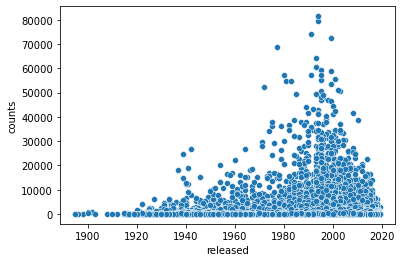

In [24]:
sns.scatterplot(x='released', y='counts', data = movies_prac)

In [25]:
len(movies_prac.index)

16919

In [38]:
movies_prac

,movieId,title,genres,rating,released,counts
0,171011,Planet Earth II (2016),Documentary,4.483096,2016,1124
1,159817,Planet Earth (2006),Documentary,4.464797,2006,1747
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
3,170705,Band of Brothers (2001),Action|Drama|War,4.398599,2001,1356
5,858,"Godfather, The (1972)",Crime|Drama,4.324336,1972,52498
...,...,...,...,...,...,...
16965,4775,Glitter (2001),Drama|Musical|Romance,1.125561,2001,669
16966,145096,Barbie & Her Sisters in the Great Puppy Advent...,Animation,1.118644,2015,59
16967,6483,From Justin to Kelly (2003),Musical|Romance,1.027578,2003,417
16968,8859,SuperBabies: Baby Geniuses 2 (2004),Comedy,0.899038,2004,208


<AxesSubplot:xlabel='released', ylabel='counts'>

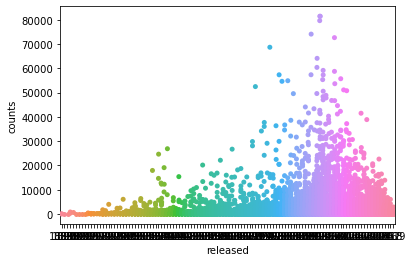

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.stripplot(data=movies_prac, x= 'released', y='counts')

<AxesSubplot:xlabel='released', ylabel='movieId'>

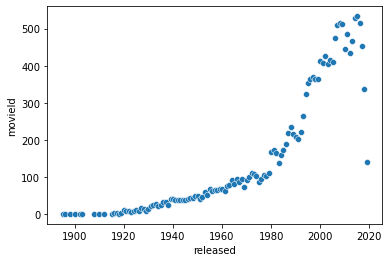

In [45]:
a = movies_prac.groupby('released')['movieId'].count()
a = pd.DataFrame(a).reset_index()
import seaborn as sns
sns.scatterplot(x='released', y='movieId', data = a)

In [69]:
print(movies_prac['released'].max())
print(movies_prac['released'].min())
print(movies_prac['released'].max()-movies_prac['released'].min()+1)

2019
1895
125


In [55]:
movies_prac.describe()

,movieId,rating,released,counts
count,16919.000000,16919.000000,16919.000000,16919.000000
mean,53926.585555,3.249236,1994.601927,1462.399019
std,58495.827679,0.480373,20.558124,4462.003199
min,1.000000,0.854839,1895.000000,25.000000
25%,4526.500000,2.964286,1986.000000,55.000000
50%,27905.000000,3.310924,2000.000000,171.000000
75%,94865.500000,3.604635,2010.000000,805.500000
max,207830.000000,4.483096,2019.000000,81491.000000


In [ ]:
a.groupby(['movieId']).plot(kind='box')

In [57]:
movies_prac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15890 entries, 0 to 15914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movieId   15890 non-null  int64  
 1   title     15890 non-null  object 
 2   genres    15890 non-null  object 
 3   rating    15890 non-null  float64
 4   released  15890 non-null  int64  
 5   counts    15890 non-null  int64  
 6   value     15890 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 993.1+ KB


In [70]:
movies_prac['released'].unique()

TypeError: 'tuple' object is not callable

In [78]:
aa = movies_prac['released'].unique()

In [81]:
print(aa.count_nonzero(axis=0))

AttributeError: 'numpy.ndarray' object has no attribute 'count_nonzero'

In [54]:
[x.size() for x in movies_3['released'] if movies_3['released'] == '2000']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
info() type() shape()

In [ ]:
astype(), dtype()
# DataFrame.astype() method is used to cast a pandas object to a specified dtype. astype() function also provides the capability to convert any suitable existing column to categorical type.
# DataFrame.astype() function comes very handy when we want to case a particular column data type to another data type

In [7]:
from datetime import datetime

for i in ratings.index:
    d_time = ratings.loc[i, 'timestamp']
#     ratings['date_time'] = datetime.fromtimestamp(d_time)
# ratings.head()
d_time
# # ratings['date_time'] = datetime.fromtimestamp(ratings['timestamp'])

KeyboardInterrupt: 